## 09. Changing redshifts to shell (snapshot) redshifts

The $t_{MM}$ are calculated at the shells rather than the evolving positions of the halos. On the contrary, the redshifts are calculated for the individual halos are better resolved. This results in negative values of $t_{MM}$ that need to be corrected by converting the redshifts to shell redshifts.

**Script written by**: Soumya Shreeram <br>
**Project supervised by**: Johan Comparat <br>
**Date**: 1st June 2021

Import required packages

In [1]:
# astropy modules
import astropy.units as u
import astropy.io.fits as fits

from astropy.table import Table, Column
from astropy.coordinates import SkyCoord
from astropy.cosmology import FlatLambdaCDM, z_at_value

import numpy as np

# system imports
import os
import sys
import importlib as ib

# plotting imports
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

from pandas import DataFrame
from scipy.stats import gaussian_kde

Load the imported file(s) that contains all the functions used in this notebooks

In [2]:
%matplotlib inline
font = {'family' : 'serif',
        'weight' : 'medium',
        'size'   : 22}
matplotlib.rc('font', **font)

In [3]:
sys.path.append('imported_files/')
import Exploring_DM_Halos as edh
import Agn_incidence_from_Major_Mergers as aimm
import Comparison_simulation_with_literature_data as cswl
import plotting_cswl05 as pt
import Modelling_AGN_fractions_from_literature as mafl

### 1. Defining input parameters

In [4]:
# look back into redshifts until...
redshift_limit = 2

# pixel number from the simulation file
pixel_no = '000000'

# define color palatte
pal = sns.hls_palette(10, h=.5, s=1).as_hex()
sns.set_context("paper", font_scale=2, rc={"lines.linewidth":2})

Define cosmology used in the notebook

In [5]:
cosmo = FlatLambdaCDM(H0=67.77*u.km/u.s/u.Mpc, Om0=0.307115)
h = 0.6777
L_box = 1000.0 / h

vol = cosmo.comoving_volume(redshift_limit)*(53)/(129600/np.pi)

Parameters for creating the Major Merger catalogue.

In [6]:
# get shell volume and projected radius bins [Mpc]
r_p, shell_volume = aimm.shellVolume()

# max mass ratio to classify as a major merger [dimensionless]
mass_max = 3

# defining the redshift bin for a merger in terms of dv = c*z [km/s]
dz_cut = 0.001

Booleans if one wants to skip running parts of the code

### 2. Open files and get relevant data

In [7]:
hd_agn, hd_halo, _ = edh.getHeaders(pixel_no, np.array(['agn', 'halo']))

Extracting positions and redshifts of the AGNs, galaxies, and halos

In [8]:
# halos
_, _, conditions_halo = edh.getGalaxyData(hd_halo, '', redshift_limit)

# agns
_, _, conditions_agn = edh.getAgnData(hd_agn, agn_FX_soft=0, redshift_limit=redshift_limit)    

hd_z_halo = hd_halo[conditions_halo]
hd_z_agn = hd_agn[conditions_agn]

print("Halos: %d"%(len(hd_z_halo) ))

Halos: 4506611


In [9]:
print("Agn: %d. %.2f %s of the halos are currently assigned AGNs"%(len(hd_z_agn), (100*len(hd_z_agn)/len(hd_z_halo)), '%'))

Agn: 1076520. 23.89 % of the halos are currently assigned AGNs


Load the file that has the information about the snapshots

### 3. Correcting redshifts, and obtaining $t_{\rm MM}$

In [11]:
zsnap_halo, asnap_halo = cswl.getSnapshotZ(hd_z_halo)
tmm = cswl.calTmm(cosmo, asnap_halo, zsnap_halo)

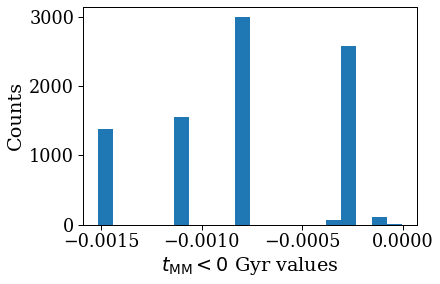

In [22]:
_ = plt.hist(tmm[tmm<0*u.Gyr].value, bins=20)
plt.ylabel('Counts')
plt.xlabel(r'$t_{\rm MM} < 0$ Gyr values')
plt.show()

Since the negative valuse are aprroaching the limit of the accuracy of the redshift, they are set to 0

In [24]:
tmm[tmm<0*u.Gyr] = 0

Now we can replot the overall distribution of $t_{\rm MM}$:

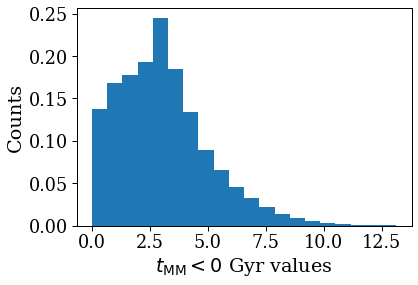

In [31]:
_ = plt.hist(tmm[0].value, bins=20)
plt.ylabel('Counts')
plt.xlabel(r'$t_{\rm MM} < 0$ Gyr values')
plt.show()